In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.28
Precision: 0.29
Recall: 0.28
F1-Score: 0.28
AUC-ROC: 0.50

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.36      0.30        61
           1       0.26      0.25      0.26        64
           2       0.34      0.24      0.28        75

    accuracy                           0.28       200
   macro avg       0.29      0.28      0.28       200
weighted avg       0.29      0.28      0.28       200



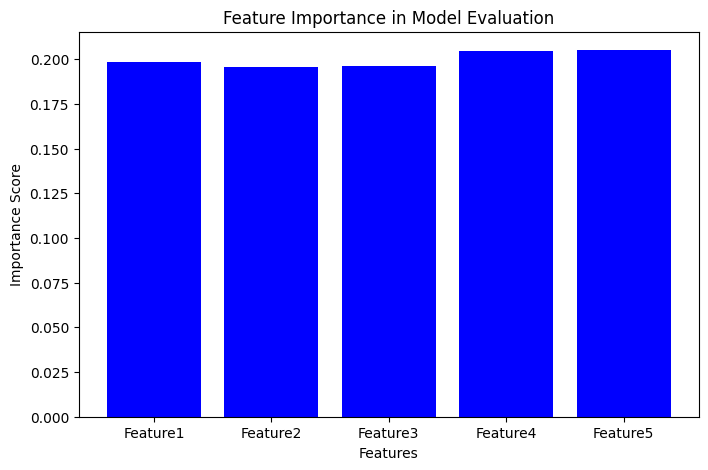

In [4]:
# Load dataset
data = pd.read_csv("model_evaluation_dataset.csv")
X = data.drop(columns=["Label"]).values
y = data["Label"].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr")

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualizing Feature Importance
plt.figure(figsize=(8, 5))
plt.bar(data.columns[:-1], clf.feature_importances_, color="blue")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Model Evaluation")
plt.show()